In [126]:
import numpy as np
from phasediv import PhaseDiv2
import matplotlib.pyplot as plt
%matplotlib inline
import tifffile

In [127]:
size_X = 512;
size_Y = 512;
p = PhaseDiv2(dshape = (size_Y,size_X),   # shape of the output stack (Nz,Ny,Nx)
              units = (.2,)*2,          # pixelsize (dz,dy,dx) in micron
              lam = 0.5,                # wavelength in micron
              NA=0.8,                 # Numerical Aperture of the detection obcejtive
              n = 1.33                  # refractive index of medium
              )

(512, 512)


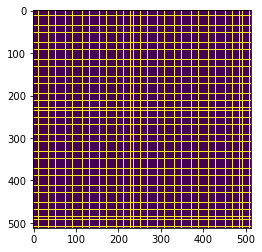

In [128]:
# Generating artificial image
img = np.zeros((size_Y,size_X))
img[4::8] = 1.
img[:,4::8] = 1.

print(img.shape)
plt.imshow(img)

In [304]:
# Loading Beautiful Lena
img = tifffile.imread("/Users/dsaha/Desktop/lena-std.tif")

#Normalizing Lena
img = (img-np.min(img))/(np.max(img)-np.min(img))

#Replacing zeros with very small number
img[img==0] = 1e-10

#plt.imshow(img)
#plt.colorbar()

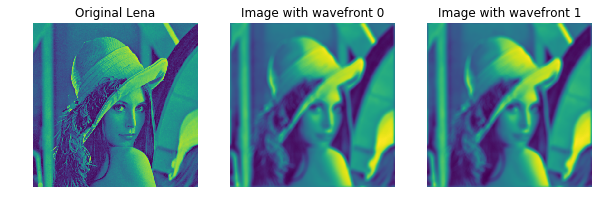

In [314]:
#The unknown aberation present in our image
abb = 0*p.zernike(5)

#Wavefront tuple contains the wavefront for the phase diversity images
wavefronts = (1*p.zernike(5)+abb,(-1*p.zernike(5))+abb)

#Generating the psfs and normalizing and storing them as a tuple
_psfs = tuple(np.fft.fftshift(p._psf_incoherent(w)) for w in wavefronts)
psfs = tuple((p-np.min(p))/(np.max(p)-np.min(p)) for p in _psfs)


#Generating the images where object is convolved with psf
images = tuple(np.fft.fftshift(p.myconvolve(img,psf)) for psf in psfs)


plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original Lena")
plt.axis("OFF")
for i,image in enumerate(images):
    plt.subplot(1,3,i+2)
    plt.imshow(image)
    #plt.colorbar()
    plt.title("Image with wavefront %s"%i)
    plt.axis("off")


In [315]:
#FFT of PSFs for two wavefronts
fftpsfs =  np.fft.fftshift(np.fft.fft2(psfs))

#FFT of Images for two wavefronts
fftimages = tuple(np.fft.fft2(image) for image in images)

#Representing the complex FFT info in amp and phase format
phase = tuple(np.angle(fftimage) for fftimage in fftimages)
amp = tuple(np.absolute(fftimage) for fftimage in fftimages)


#Dividing the FFT Images to get rid of the obejct
fftimage_amp_div = np.divide(amp[0],amp[1])
fftimage_phase_sub = np.subtract(phase[0],phase[1])
print(np.mean(fftimage_amp_div))
print(np.mean(fftimage_phase_sub))


1.0074727842
-1.11300881434e-12
